In [3]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

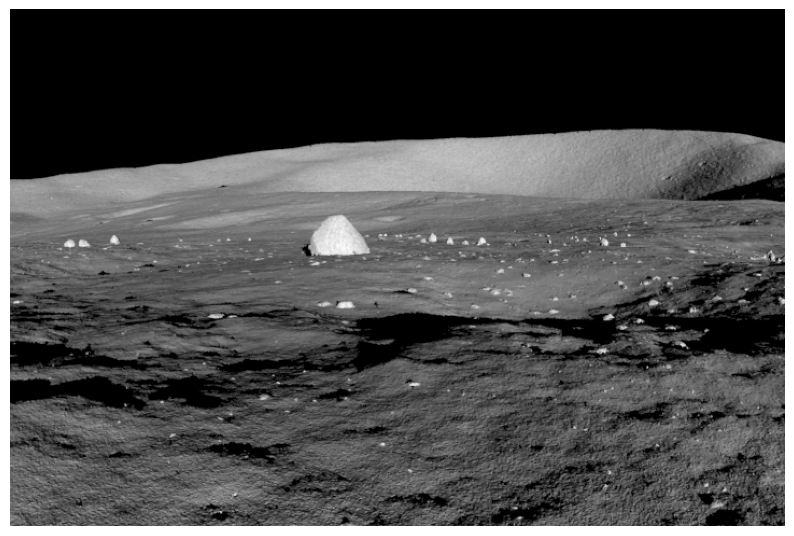

In [4]:
image_path = "dataset/images/render/render0001.png"

image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

## Show image
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


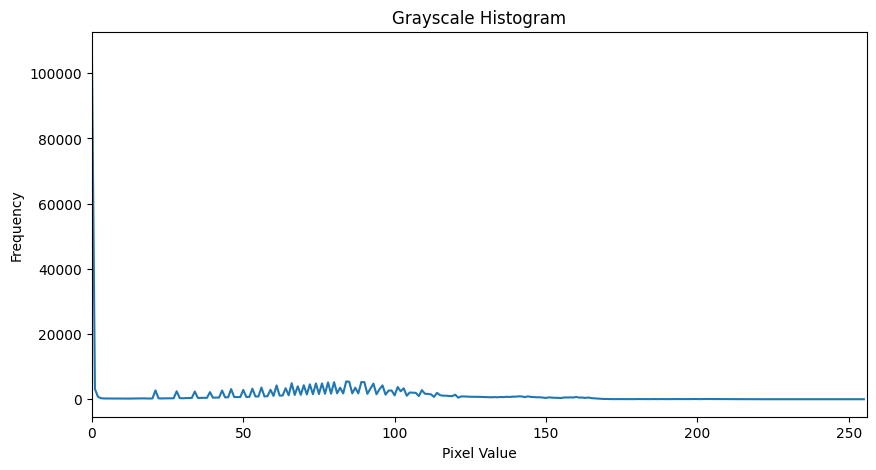

In [6]:
def show_histogram(image):
    # Calculate histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.plot(histogram)
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.xlim([0, 256])
    plt.show()


show_histogram(image)

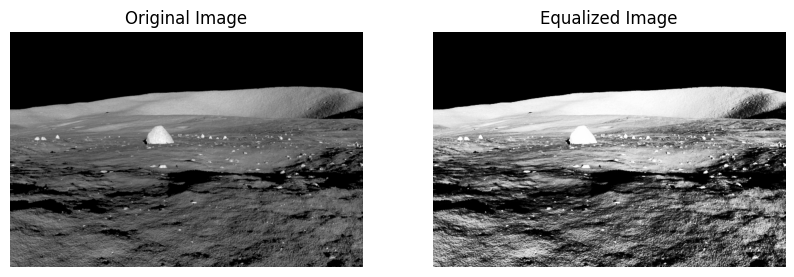

In [7]:
def equalize_histogram(image):
    # Equalize histogram
    equalized_image = cv2.equalizeHist(image)

    # Show original and equalized images
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title("Equalized Image")
    plt.axis('off')

    plt.show()

    return equalized_image
equalized_image = equalize_histogram(image)

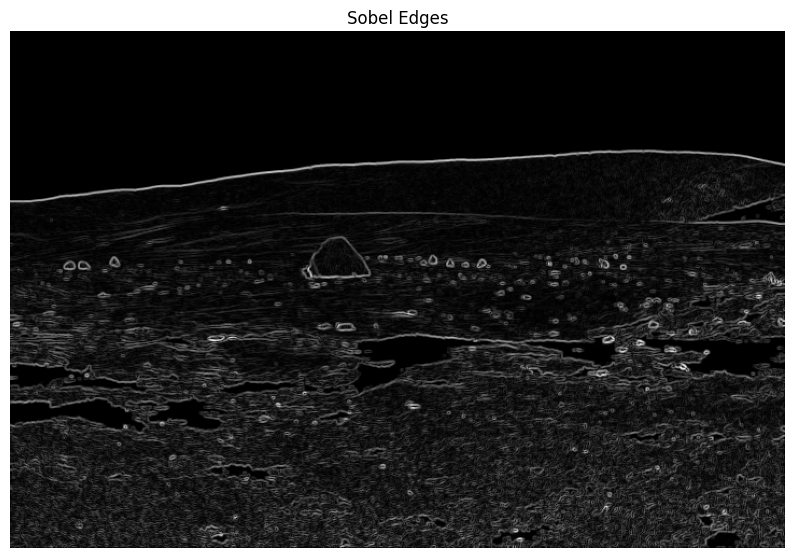

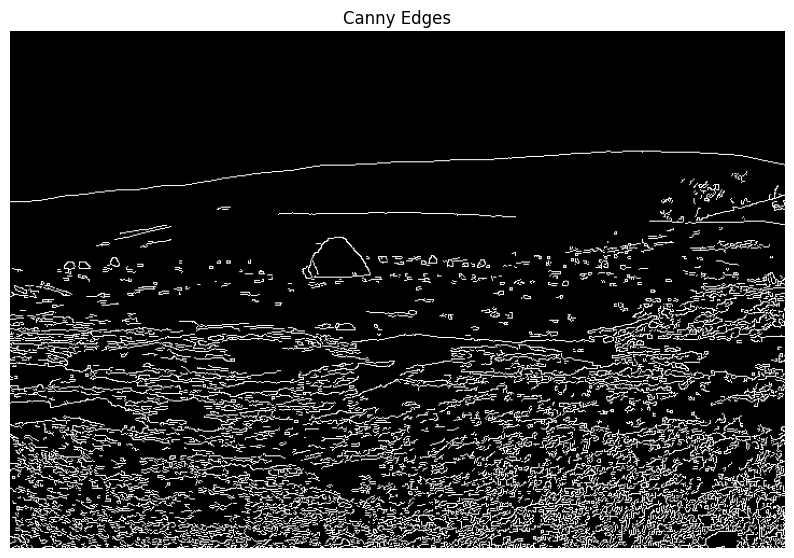

In [9]:
def sobel_edges(img):
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    return cv2.magnitude(sobel_x, sobel_y)

def canny_edges(img):
    # Apply Canny edge detection
    edges = cv2.Canny(img, 100, 200)
    return edges


sobel_image = sobel_edges(image)
plt.figure(figsize=(10, 10))
plt.imshow(sobel_image, cmap='gray')
plt.axis('off')
plt.title("Sobel Edges")
plt.show()

canny_image = canny_edges(image)
plt.figure(figsize=(10, 10))
plt.imshow(canny_image, cmap='gray')
plt.axis('off')
plt.title("Canny Edges")
plt.show()

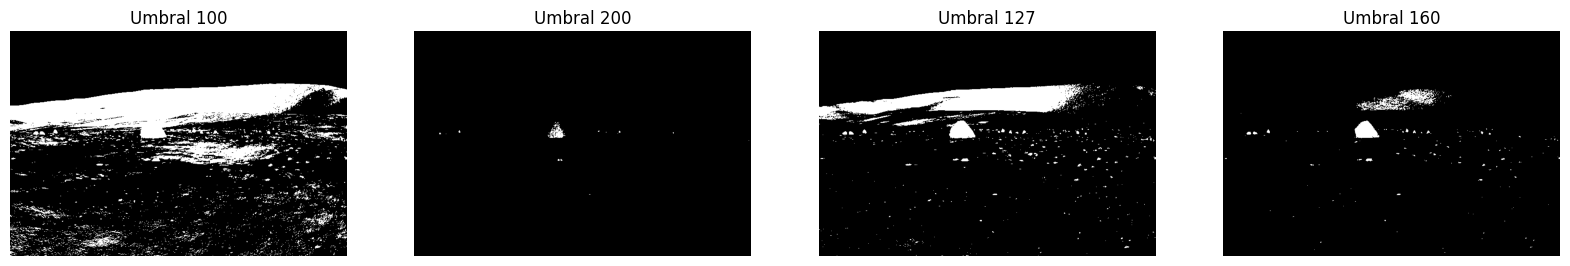

In [13]:
def umbralize(img, threshold=127):
    # Apply Otsu's thresholding
    _, thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return thresh

umbral100_image = umbralize(image, 100)
umbral200_image = umbralize(image, 200)
umbral127_image = umbralize(image, 127)
umbral160_image = umbralize(image, 160)

plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(umbral100_image, cmap='gray')
plt.axis('off')
plt.title("Umbral 100")
plt.subplot(1, 4, 2)
plt.imshow(umbral200_image, cmap='gray')
plt.axis('off')
plt.title("Umbral 200")
plt.subplot(1, 4, 3)
plt.imshow(umbral127_image, cmap='gray')
plt.axis('off')
plt.title("Umbral 127")
plt.subplot(1, 4, 4)
plt.imshow(umbral160_image, cmap='gray')
plt.axis('off')
plt.title("Umbral 160")
plt.show()


